In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [12]:
df=pd.read_csv("TaxiFare.csv")
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [13]:
df.tail()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,13:14.0,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [14]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [15]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [16]:
df.shape

(50000, 8)

In [17]:
df.duplicated().sum()

0

In [18]:
df=df.drop(["unique_id","date_time_of_pickup"],axis=1)

In [19]:
df.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [20]:
df.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

# Data visualization

<function matplotlib.pyplot.show(close=None, block=None)>

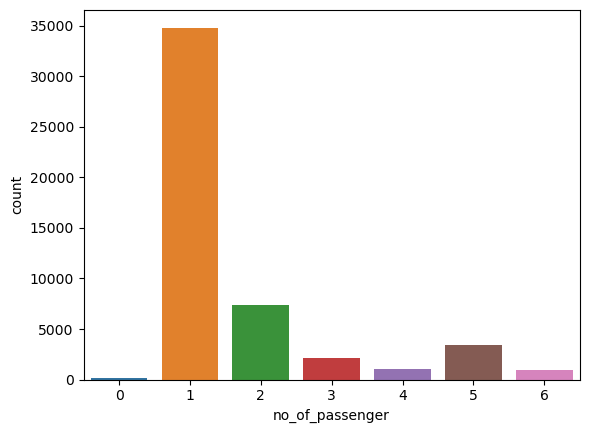

In [25]:
sns.countplot(x="no_of_passenger",data=df)
plt.show

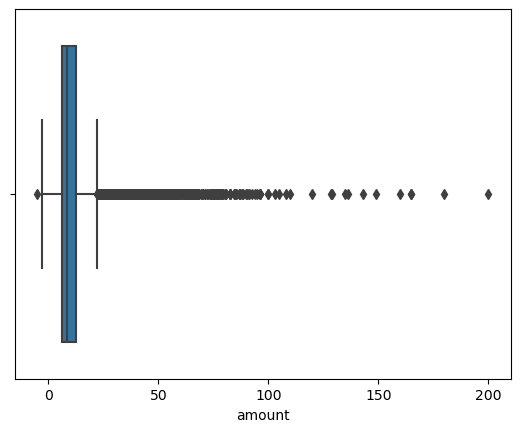

In [26]:
sns.boxplot(x="amount",data=df)
plt.show()

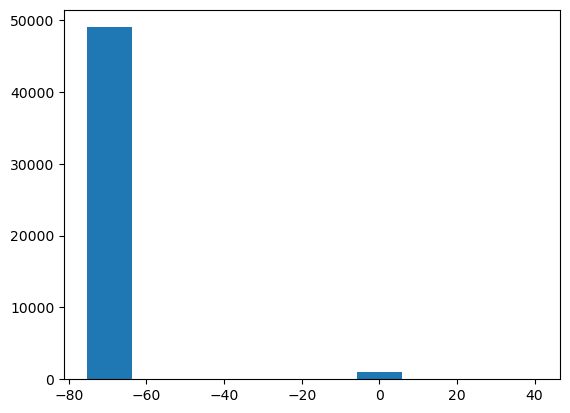

In [27]:
plt.hist("longitude_of_pickup",data=df)
plt.show()

<Axes: xlabel='amount'>

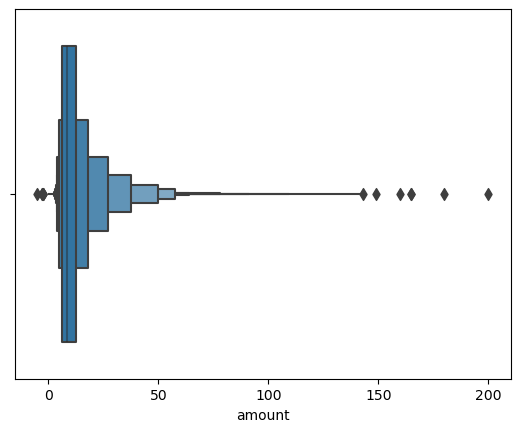

In [28]:
sns.boxenplot(x='amount',data=df)

In [29]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


# Replacing missing values

In [30]:
median1=df["latitude_of_pickup"].median()
df["latitude_of_pickup"]=df["latitude_of_pickup"].replace(np.nan,median1)

In [31]:
median1=df["longitude_of_dropoff"].median()
df["longitude_of_dropoff"]=df["longitude_of_dropoff"].replace(np.nan,median1)

In [32]:
median1=df["latitude_of_dropoff"].median()
df["latitude_of_dropoff"]=df["latitude_of_dropoff"].replace(np.nan,median1)

In [33]:
median1=df["no_of_passenger"].median()
df["no_of_passenger"]=df["no_of_passenger"].replace(np.nan,median1)

In [34]:
df.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split


In [37]:
Y=df["amount"]
X=df.drop(["amount"],axis=1)

# linear regession

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [39]:
model=LinearRegression()

In [40]:
model.fit(X_train,Y_train)

LinearRegression()

In [41]:
model.score(X_train,Y_train)

0.0003568617021321163

In [42]:
model.score(X_test,Y_test)

0.00021645354164490094

# RandomForest Regression

In [43]:
model=RandomForestRegressor(n_estimators=15,max_features=0.5, min_samples_split=40)

In [44]:
model.fit(X_train,Y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=40, n_estimators=15)

In [45]:
model.score(X_train,Y_train)

0.8210032708842809

In [46]:
model.score(X_test,Y_test)

0.7735297011326072

# DecisionTree Regressor

In [52]:
model=DecisionTreeRegressor(criterion='friedman_mse',min_samples_split=80)

In [53]:
model.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='friedman_mse', min_samples_split=80)

In [54]:
model.score(X_train,Y_train)

0.8013940960935537

In [55]:
model.score(X_test,Y_test)

0.7375117376384208

# KNeighorsRegressor

In [56]:
model=KNeighborsRegressor(n_neighbors=10)

In [57]:
model.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=10)

In [58]:
model.score(X_train,Y_train)

0.7542518338369981

In [59]:
model.score(X_test,Y_test)

0.7422753673996463

# GradientBoostingRegressor

In [60]:
model=GradientBoostingRegressor()

In [61]:
model.fit(X_train,Y_train)

GradientBoostingRegressor()

In [62]:
model.score(X_train,Y_train)

0.7415185898476133

In [63]:
model.score(X_test,Y_test)

0.742852533353905

# BaggingRegressor

In [64]:
model=BaggingRegressor(n_estimators=20,max_samples=0.15)

In [65]:
model.fit(X_train,Y_train)

BaggingRegressor(max_samples=0.15, n_estimators=20)

In [66]:
model.score(X_train,Y_train)

0.7895143028197172

In [67]:
model.score(X_test,Y_test)

0.7740561025072303

# AdaBoostRegressor

In [68]:
model=AdaBoostRegressor(n_estimators=10,loss='linear',learning_rate=0.1)

In [69]:
model.fit(X_train,Y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=10)

In [70]:
model.score(X_train,Y_train)

0.5093312786165527

In [71]:
model.score(X_test,Y_test)

0.525257185938665